## Customer Segmentation using RFM Analysis and KMeans Culstering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.shape

(541909, 8)

In [6]:
cust_data=df[['Country','CustomerID']].drop_duplicates()

In [7]:
cust_data.groupby('Country')['CustomerID'].aggregate('count')

Country
Australia                  9
Austria                   11
Bahrain                    2
Belgium                   25
Brazil                     1
Canada                     4
Channel Islands            9
Cyprus                     8
Czech Republic             1
Denmark                    9
EIRE                       3
European Community         1
Finland                   12
France                    87
Germany                   95
Greece                     4
Hong Kong                  0
Iceland                    1
Israel                     4
Italy                     15
Japan                      8
Lebanon                    1
Lithuania                  1
Malta                      2
Netherlands                9
Norway                    10
Poland                     6
Portugal                  19
RSA                        1
Saudi Arabia               1
Singapore                  1
Spain                     31
Sweden                     8
Switzerland               21
USA   

In [8]:
cust_data.groupby('Country')['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [9]:
df=df.query("Country=='United Kingdom'").reset_index(drop=True)

In [10]:
df.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [11]:
#df=df[pd.notnull(df['CustomerID'])]
df.CustomerID.dropna
df.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [12]:
df.Quantity.min()

-80995

In [13]:
df=df[df['Quantity']>0]

In [14]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

In [15]:
df.UnitPrice.min()

-11062.06

In [16]:
df["TotalAmount"]=df["Quantity"]*df["UnitPrice"]

In [17]:
df.shape

(486286, 9)

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [19]:
LatestTime=dt.datetime(2011,12,10)

In [20]:
RFMScores=df.groupby("CustomerID").agg({'InvoiceDate':lambda x:(LatestTime-x.max()).days,'InvoiceNo':lambda x:len(x),'TotalAmount':lambda x:x.sum()})

In [21]:
RFMScores["InvoiceDate"]=RFMScores["InvoiceDate"].astype(int)

In [22]:
RFMScores.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalAmount':'Monetory'},inplace=True)

In [23]:
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetory
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [24]:
RFMScores.describe()

,Recency,Frequency,Monetory
count,3921.000000,3921.000000,3921.000000
mean,91.722265,90.371079,1863.910113
std,99.528532,217.796155,7481.922217
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,300.040000
50%,50.000000,41.000000,651.820000
75%,142.000000,99.000000,1575.890000
max,373.000000,7847.000000,259657.300000


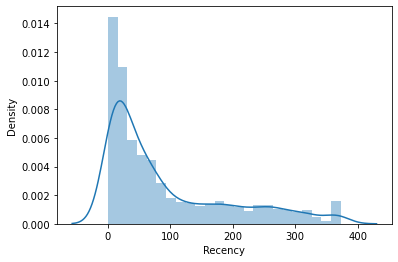

In [25]:
import seaborn as sns
x=RFMScores['Recency']
ax=sns.distplot(x)

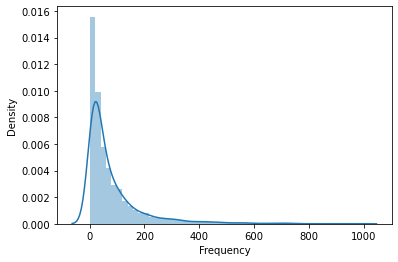

In [26]:
x=RFMScores.query('Frequency<1000')['Frequency']
ax=sns.distplot(x)

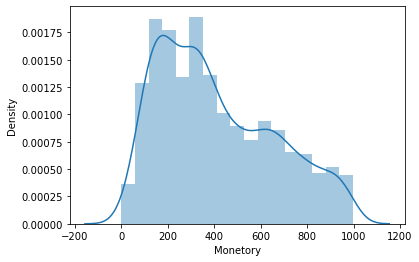

In [27]:
x=RFMScores.query('Monetory<1000')['Monetory']
ax=sns.distplot(x)

In [28]:
#splitiing the data into four segments
quantiles=RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles=quantiles.to_dict()

In [29]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetory': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

In [30]:
#Functions to create R,F and M Segments
def RScoring(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.5]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.5]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1
    

In [31]:
#Add R,F and M segment value in the existing dataset to show R,F and M values
RFMScores['R']=RFMScores['Recency'].apply(RScoring,args=('Recency',quantiles,))
RFMScores['F']=RFMScores['Frequency'].apply(FnMScoring,args=('Frequency',quantiles,))
RFMScores['M']=RFMScores['Monetory'].apply(FnMScoring,args=('Monetory',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetory,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [32]:
#Calculate and add RFM group value column showing combined concatenated score of RFM
RFMScores['RFMGroup']=RFMScores.R.map(str)+RFMScores.F.map(str)+RFMScores.M.map(str)

#Calculating RFM score by adding R,F,M values
RFMScores['RFMScore']=RFMScores[['R','F','M']].sum(axis=1)
RFMScores.head()

,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4596,33719.73,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5


In [33]:
#Assign loyalty level to each customer
Loyalty_level=['Platinum','Gold','Silver','Bronze']
score_cuts=pd.qcut(RFMScores.RFMScore,q=4,labels=Loyalty_level)
RFMScores['RFM_Loyalty_Level']=score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum
2,12748.0,0,4596,33719.73,1,1,1,111,3,Platinum
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum
4,12820.0,3,59,942.34,1,2,2,122,5,Platinum


In [34]:
#Validate the data for RFMGroup=111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetory',ascending=False).reset_index().head(10)



,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
1,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
2,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
3,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
4,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum
5,13694.0,3,568,65039.62,1,1,1,111,3,Platinum
6,15311.0,0,2379,60767.90,1,1,1,111,3,Platinum
7,13089.0,2,1818,58825.83,1,1,1,111,3,Platinum
8,15769.0,7,130,56252.72,1,1,1,111,3,Platinum
9,15061.0,3,403,54534.14,1,1,1,111,3,Platinum


## K Means Clustering

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [36]:
def  neg_n_zero(num):
    if num <= 0:
     return 1
    else :
     return num
RFMScores['Recency']=[neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetory']=[neg_n_zero(x) for x in RFMScores.Monetory]

In [37]:
#Perform log Transformation to bring data into normal or near normal distribution
Log_Data=RFMScores[['Recency','Frequency','Monetory']].apply(np.log,axis=1).round(3)

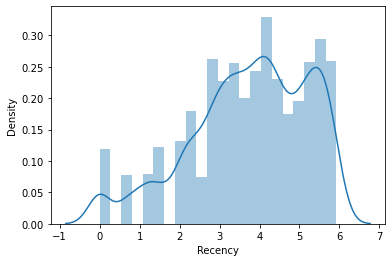

In [38]:
#Data distribution after normalisation for Recency
Recency_plot=Log_Data['Recency']
ax=sns.distplot(Recency_plot)

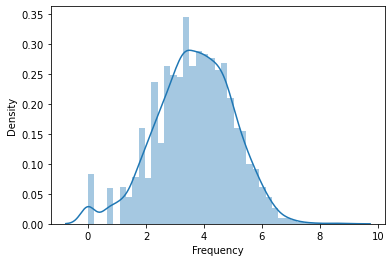

In [39]:
#Data distribution after normalisation for Frequency
Frequency_plot=Log_Data['Frequency']
ax=sns.distplot(Frequency_plot)

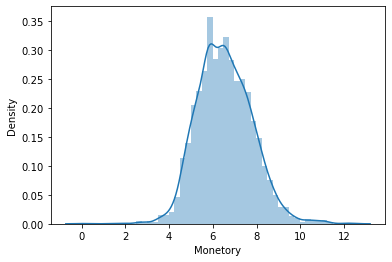

In [40]:
#Data distribution after normalisation for Monetory
Monetory_plot=Log_Data['Monetory']
ax=sns.distplot(Monetory_plot)

In [41]:
#Scale the data
scaler=StandardScaler()
Scaled_data=scaler.fit_transform(Log_Data)

In [42]:
Scaled_data=pd.DataFrame(Scaled_data,index=RFMScores.index,columns=Log_Data.columns)

In [43]:
sum_of_sq_dist={}
for k in range(1,15):
    km=KMeans(n_clusters=k,init='k-means++',max_iter=1000)
    km=km.fit(Scaled_data)
    sum_of_sq_dist[k]=km.inertia_

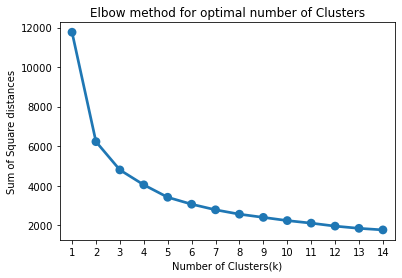

In [44]:
#Plot the graph of sum of squares and number of clusters
sns.pointplot(x=list(sum_of_sq_dist.keys()),y=list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square distances')
plt.title('Elbow method for optimal number of Clusters')
plt.show()

In [45]:
#Build the KMeans Clustering Model
KMeans_Clust=KMeans(n_clusters=3,init='k-means++',max_iter=1000)
KMeans_Clust.fit(Scaled_data)

KMeans(max_iter=1000, n_clusters=3)

In [46]:
#Fit the cluusters for the observatins given in the dataset
RFMScores['Cluster']=KMeans_Clust.labels_
RFMScores.head()

,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,2
12747.0,2,103,4196.01,1,1,1,111,3,Platinum,1
12748.0,1,4596,33719.73,1,1,1,111,3,Platinum,1
12749.0,3,199,4090.88,1,1,1,111,3,Platinum,1
12820.0,3,59,942.34,1,2,2,122,5,Platinum,1


<Figure size 504x504 with 0 Axes>

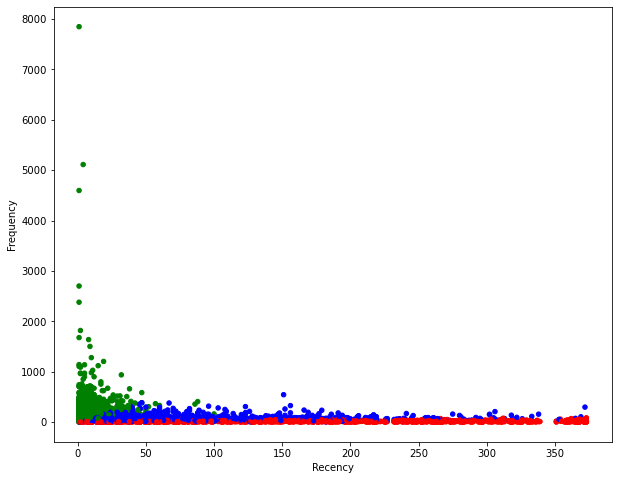

In [47]:
plt.figure(figsize=(7,7))

#scatter plot Frequency vds Recency
Colors=['red','green','blue']
RFMScores['Colors'] = RFMScores.Cluster.map(lambda p: Colors[p])
ax = RFMScores.plot(kind="scatter",x="Recency",y="Frequency",figsize=(10,8),c=RFMScores['Colors'])

In [48]:
RFMScores.head()

,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Colors
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,2,blue
12747.0,2,103,4196.01,1,1,1,111,3,Platinum,1,green
12748.0,1,4596,33719.73,1,1,1,111,3,Platinum,1,green
12749.0,3,199,4090.88,1,1,1,111,3,Platinum,1,green
12820.0,3,59,942.34,1,2,2,122,5,Platinum,1,green


## Conclusion
* Customers are segmented into 3 Groups by K-Means Clustering.
* Customers with Platinum Royalty level are assigned green color.
* Customers with Gold and Silver Royalty level are assigned grblue color.
* Customers with Bronze Royalty level are assigned red color.